#### Importing the libraries 

In [2]:
import calendar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



import warnings
warnings.filterwarnings(action = 'ignore')

reading the data from csv file

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#checking the shape of the dataframes i.e number of rows and columns
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#setting the categorical variables
cat_vars = ['mnth', 'season', 'weekday', 'weathersit']

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data cleaning and manipulation

Checking for duplicate rows

In [12]:

duplicate_rows = len(df[df.duplicated()])
duplicate_rows

0

In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
df.shape

(730, 16)

- Dropping casula and registered as our predictor Variable is cnt which combination of casual and registered columns. Hence they are irrelevant for this use case
- Dropping instant as it is index values, hence irrelevant
- Dropping dteday as we already have year and month as columns and specific date is unneccesary for our analysis

In [16]:
#Dropping casula and registered as our predictor Variable is cnt which combination of casual and registered columns. Hence they are irrelevant for this use case
#Dropping instant as it is index values, hence irrelevant
#Dropping dteday as we already have year and month as columns and specific date is unneccesary for our analysis
drop_cols = ['casual','registered','instant','dteday']
df.drop(drop_cols,axis=1,inplace = True)


In [17]:
df.shape

(730, 12)

In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

- converting season into categorical values

In [20]:
#converting season into cat variable
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [21]:
df['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

In [22]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Converting weekday into categorical values

In [25]:
df['weekday'].replace({0:"monday",1:"tuesday",2:"wednesday",3:"thursday",4:"friday",5:"saturday",6:"sunday"}, inplace = True)

In [26]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,sunday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,monday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,tuesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,wednesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,thursday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,friday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,saturday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,sunday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,monday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,tuesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


- Converting mnth into categorical values

In [28]:
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_name[x])

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,sunday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,monday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,tuesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,wednesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,thursday,1,1,9.305237,11.46350,43.6957,12.522300,1600


weathersit : -  Clear, Few clouds, Partly cloudy, Partly cloud -clear
- : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mi -mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clo -light_snow
-  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow +        -heavy_rain Foguds

- Converting weathersit into categorical values

In [32]:
df['weathersit'].replace({ 1: 'Clear', 2: 'Mist', 3: 'Light_snow', 4: 'Heavy_rain' }, inplace = True)

In [33]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- Converting year into categorical values

In [35]:
df['yr'].replace({0:'2018',1:'2019'},inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,0,sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,0,monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,0,tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,0,wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,0,thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [37]:
df.dtypes

season         object
yr             object
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [38]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Defining Numerical and Categorical variables

In [40]:
cat_vars = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_vars = ["temp","atemp","hum","windspeed"] #- excluded cnt as it is target variable

### EDA

#### Univariate Analysis for Numeric Variables

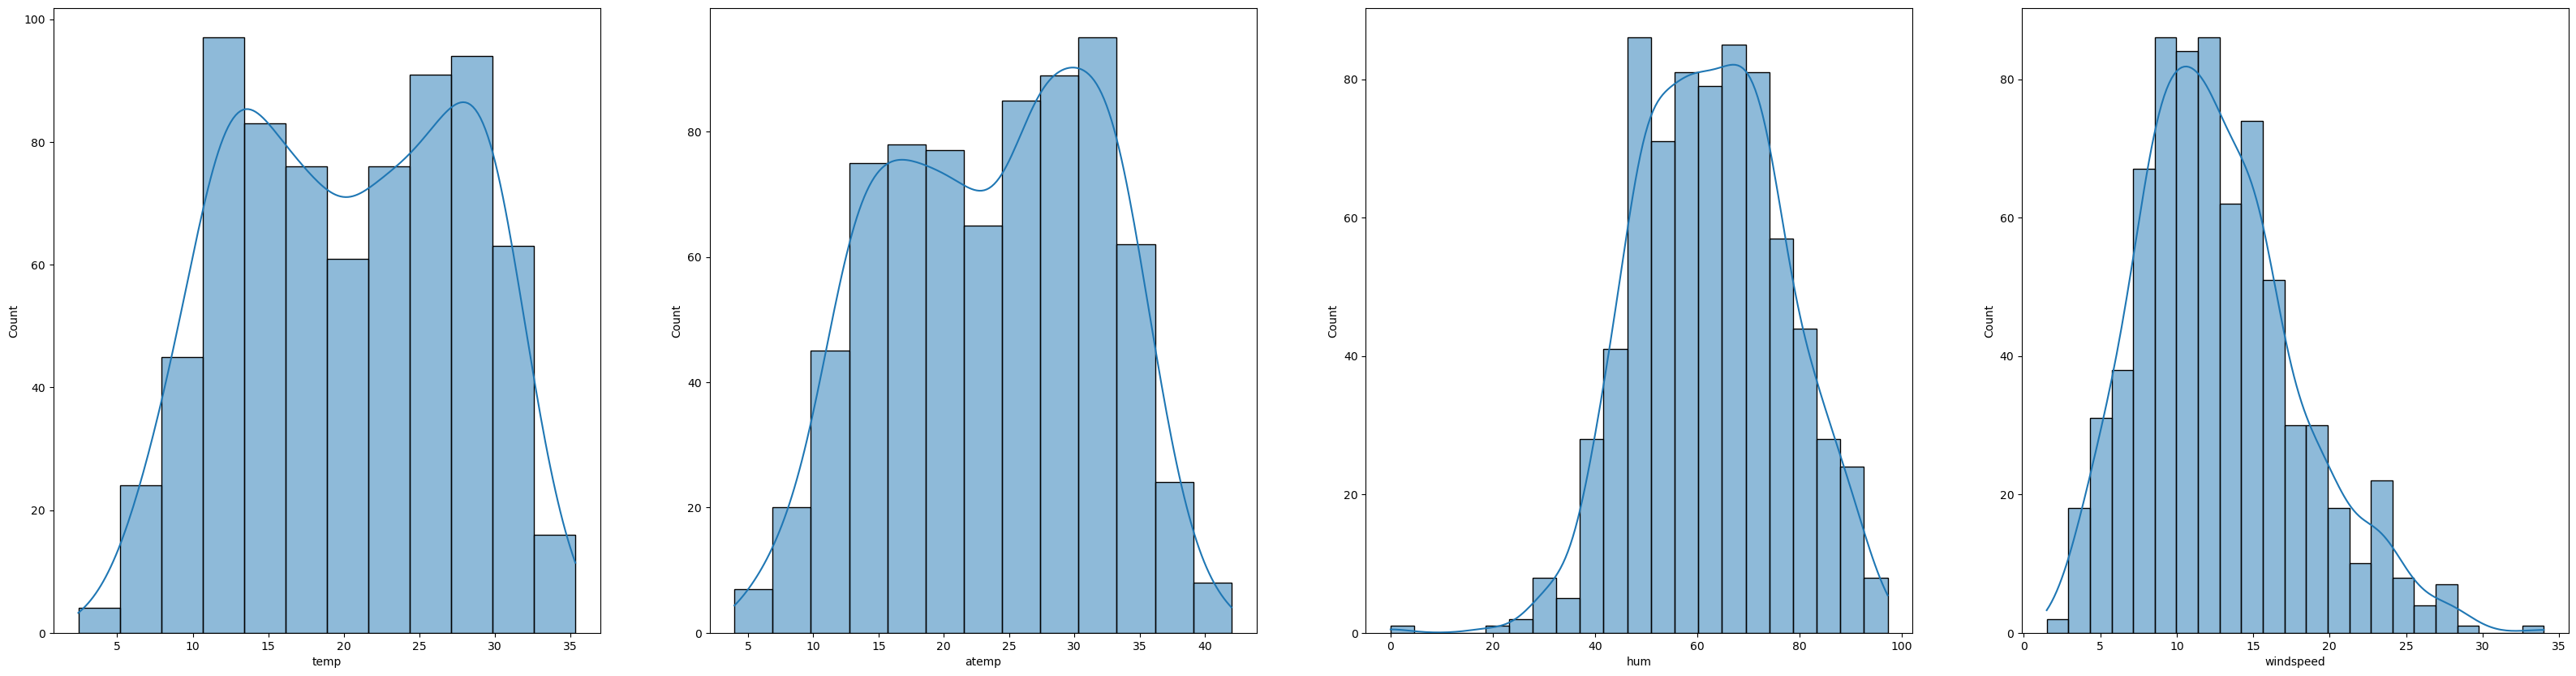

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_vars), figsize=(40, 10))

for i in range(len(num_vars)):
    sns.histplot(data=df, x=num_vars[i], ax=ax[i], kde=True)  

plt.show()

- temp: The average temperature when the bikes were rented is around 20 Celsius
- atemp:  The average feeling temperature when the bikes were rented is around 23 Celsius
- hum : The average humidity is around 62
- windspeed: the average windspeed is around 12


#### Univariate analysis of Categorical Variables

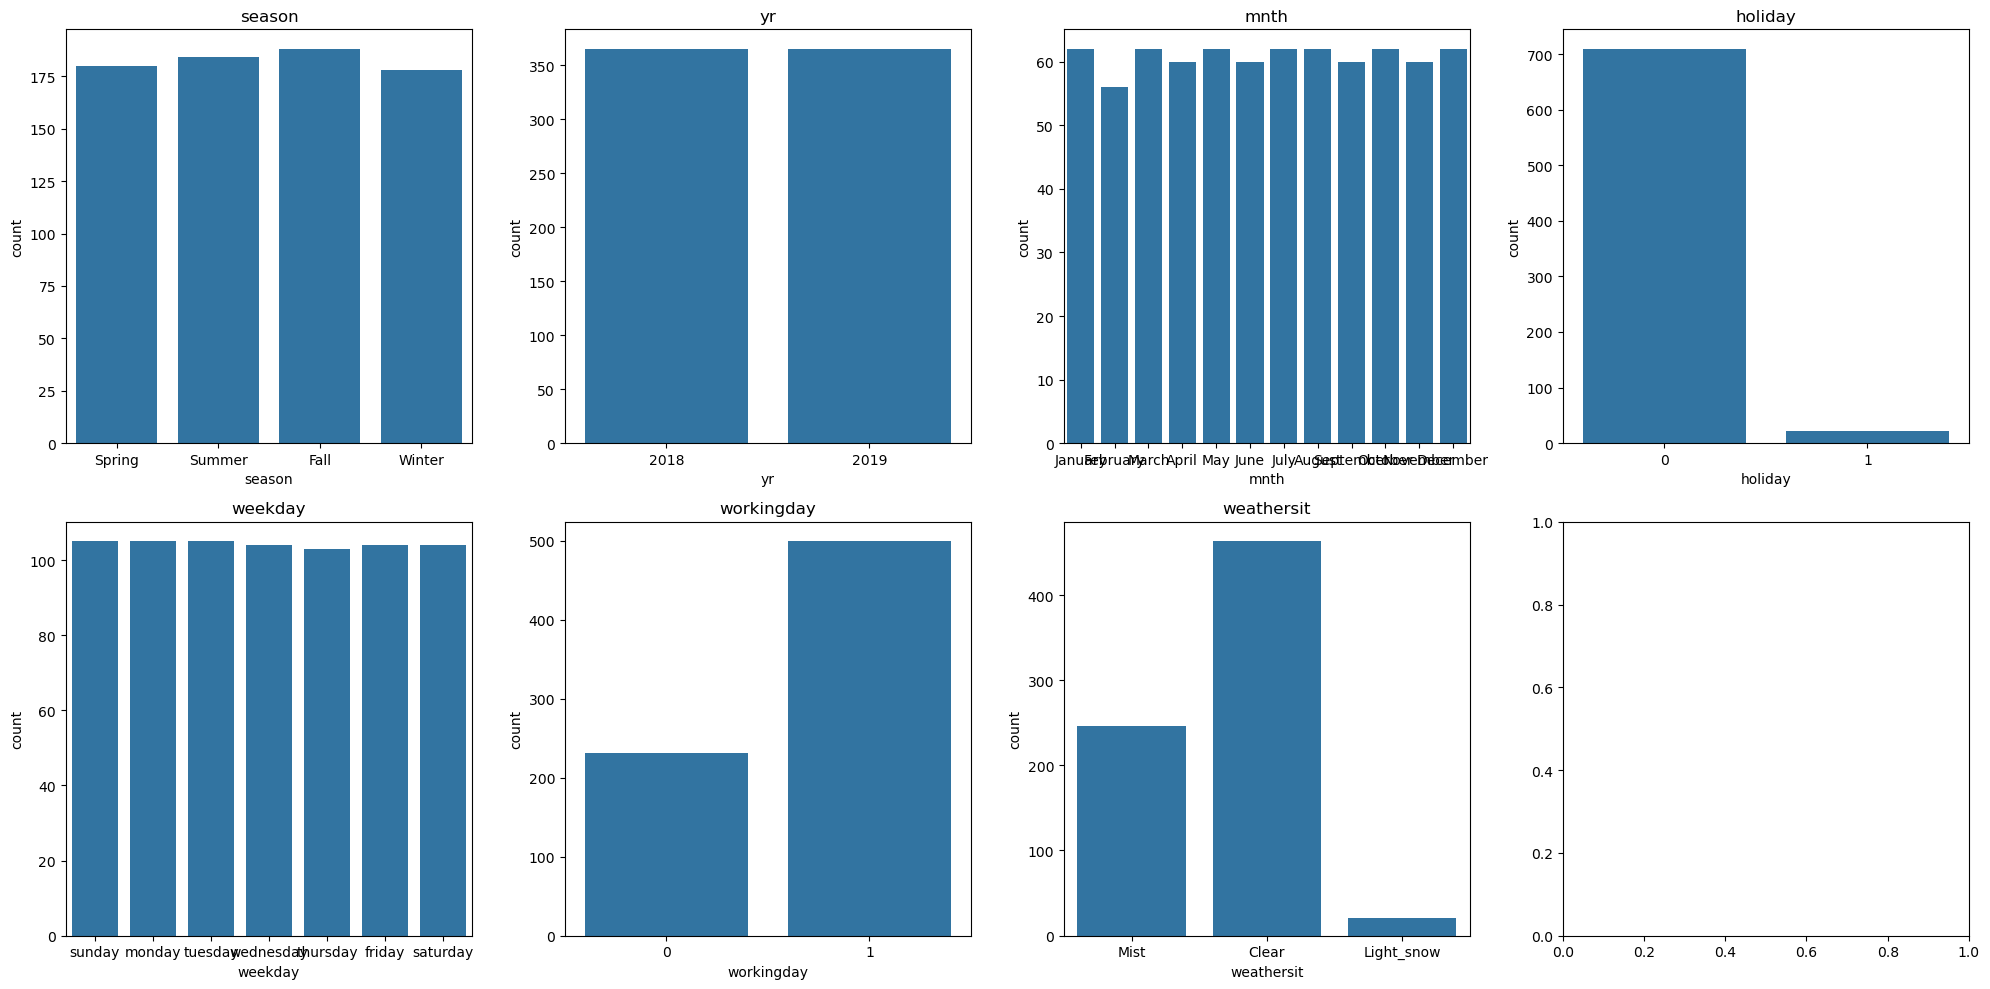

In [46]:
#Categorical Variables

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i in range(len(cat_vars)):
    sns.countplot(data=df, x=cat_vars[i], ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_title(cat_vars[i])  


plt.tight_layout()
plt.show()


- Majority of change is seen in workingdays and weathersit columns
- bikes are rented out more on working days 
- bikes are rented out morewhen the weather is clear

#### Bivariate Analysis

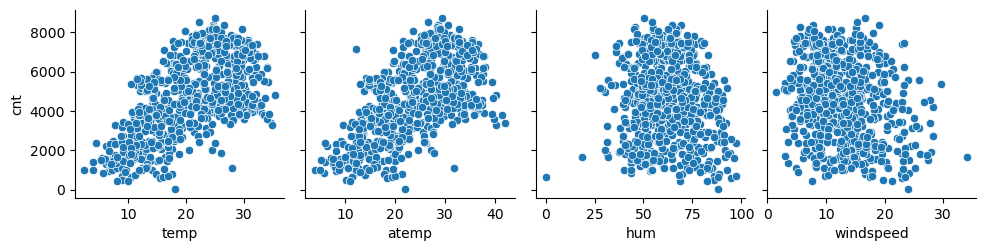

In [49]:
target_var = 'cnt'
sns.pairplot(data=df, x_vars=num_vars, y_vars=[target_var])
plt.show()

In [50]:
num_vars_cnt = []

In [51]:
num_vars_cnt = ["temp", "atemp", "hum", "windspeed", "cnt"]
corr = df[num_vars_cnt].corr(numeric_only=True)
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


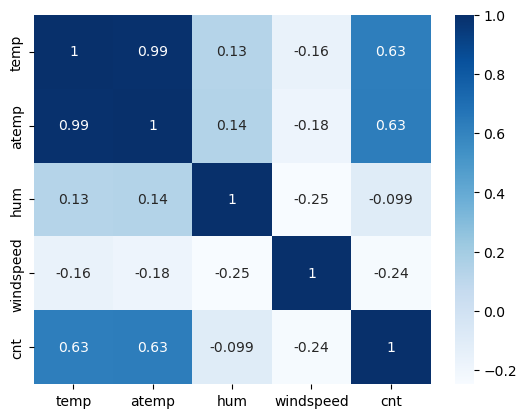

In [52]:
sns.heatmap(corr, annot=True,cmap="Blues")
plt.show()

- temp and atemp have a very with high correlation, which might lead to multi collinearity. Hence it is better to drop one of the two
- Both atemp and temp have positive high correlation with cnt(supports renting)
- whereas hum and windspeed have negative relation with cnt(does not support bike renting)

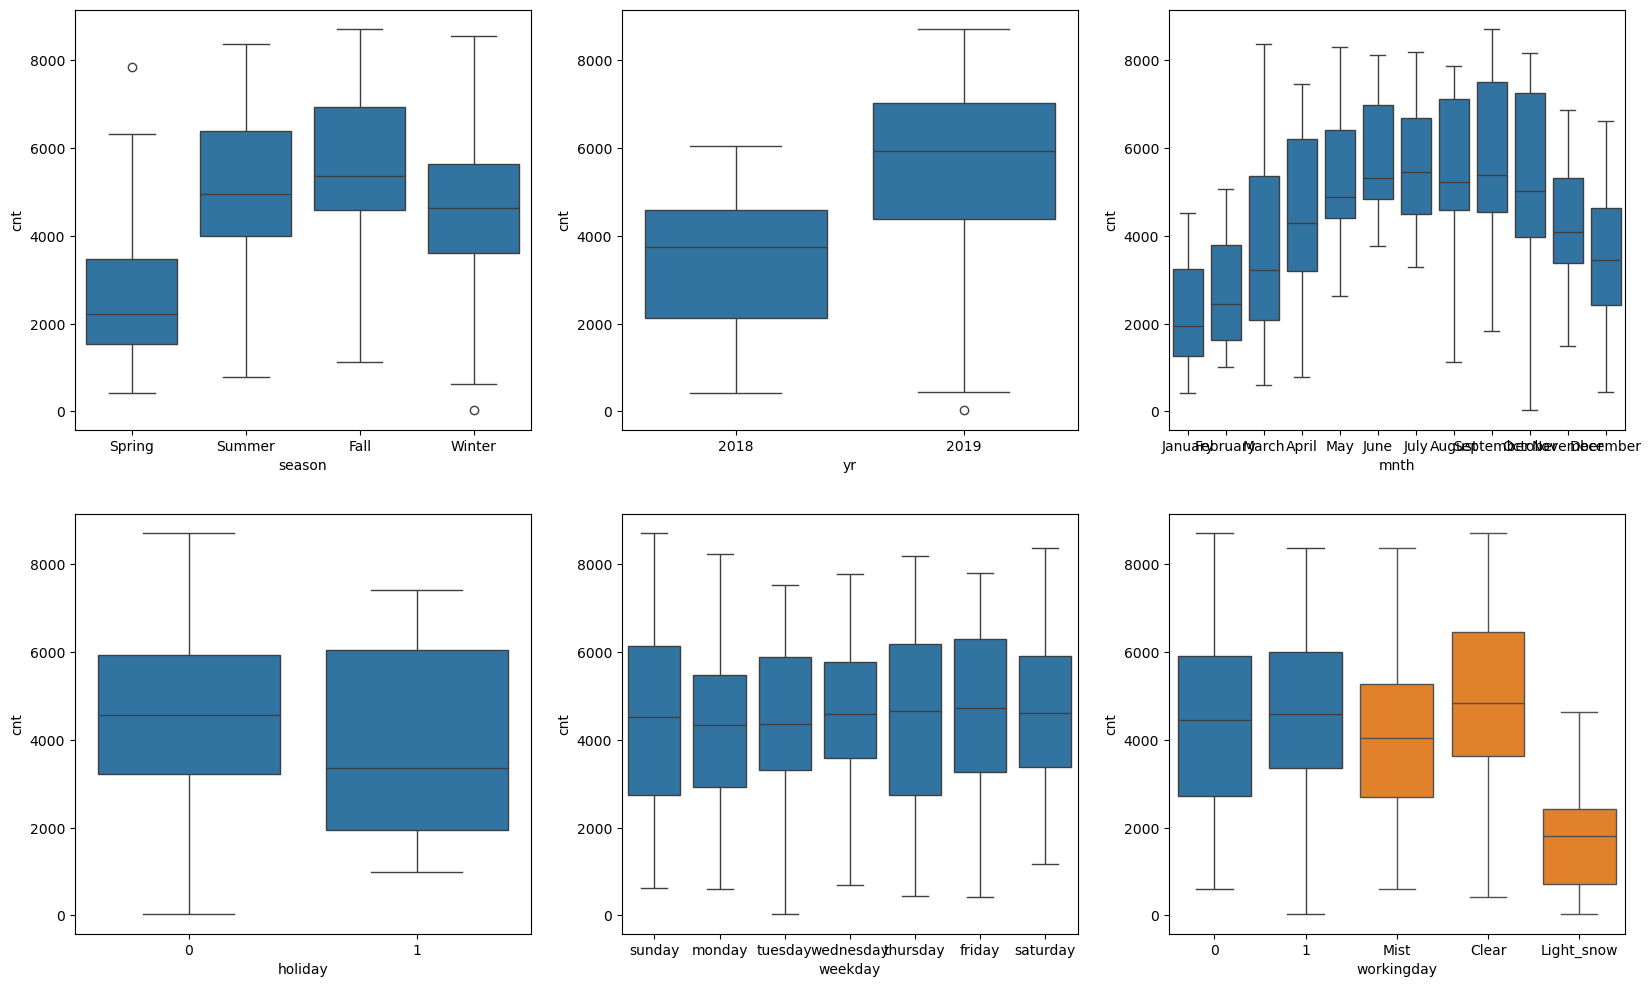

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

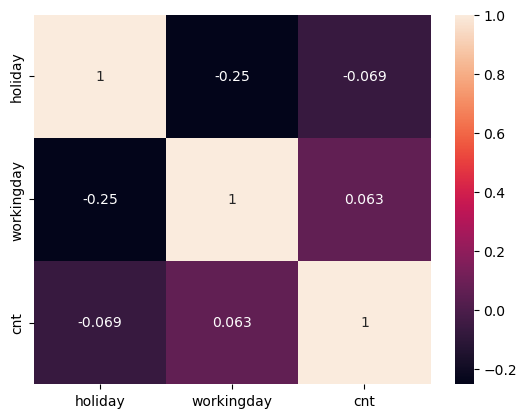

In [55]:
corr_matrix = df[cat_vars + ['cnt']].corr(numeric_only=True)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

- holiday has negative correlation with cnt
- year has the most correlation with cnt


In [57]:
#multivariate Analysis

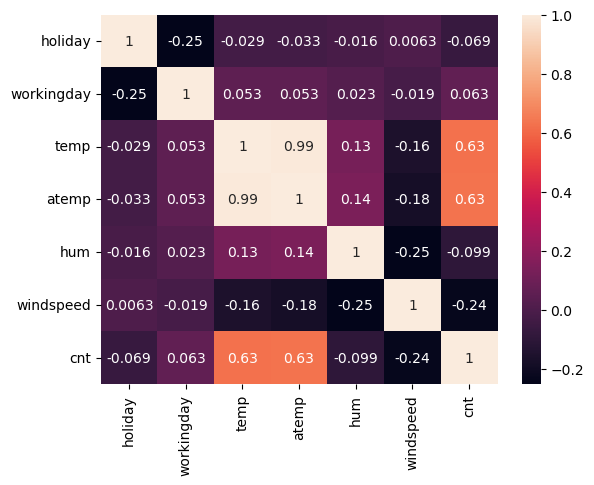

In [58]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

- Postive correlation : yr, temp, atemp, workingday, have positive coreelation with cnt
- Among these temp,atemp and yr have bery high correlation.
- Negative correlation: windspeed, hum and holiday have negative correlation with cnt



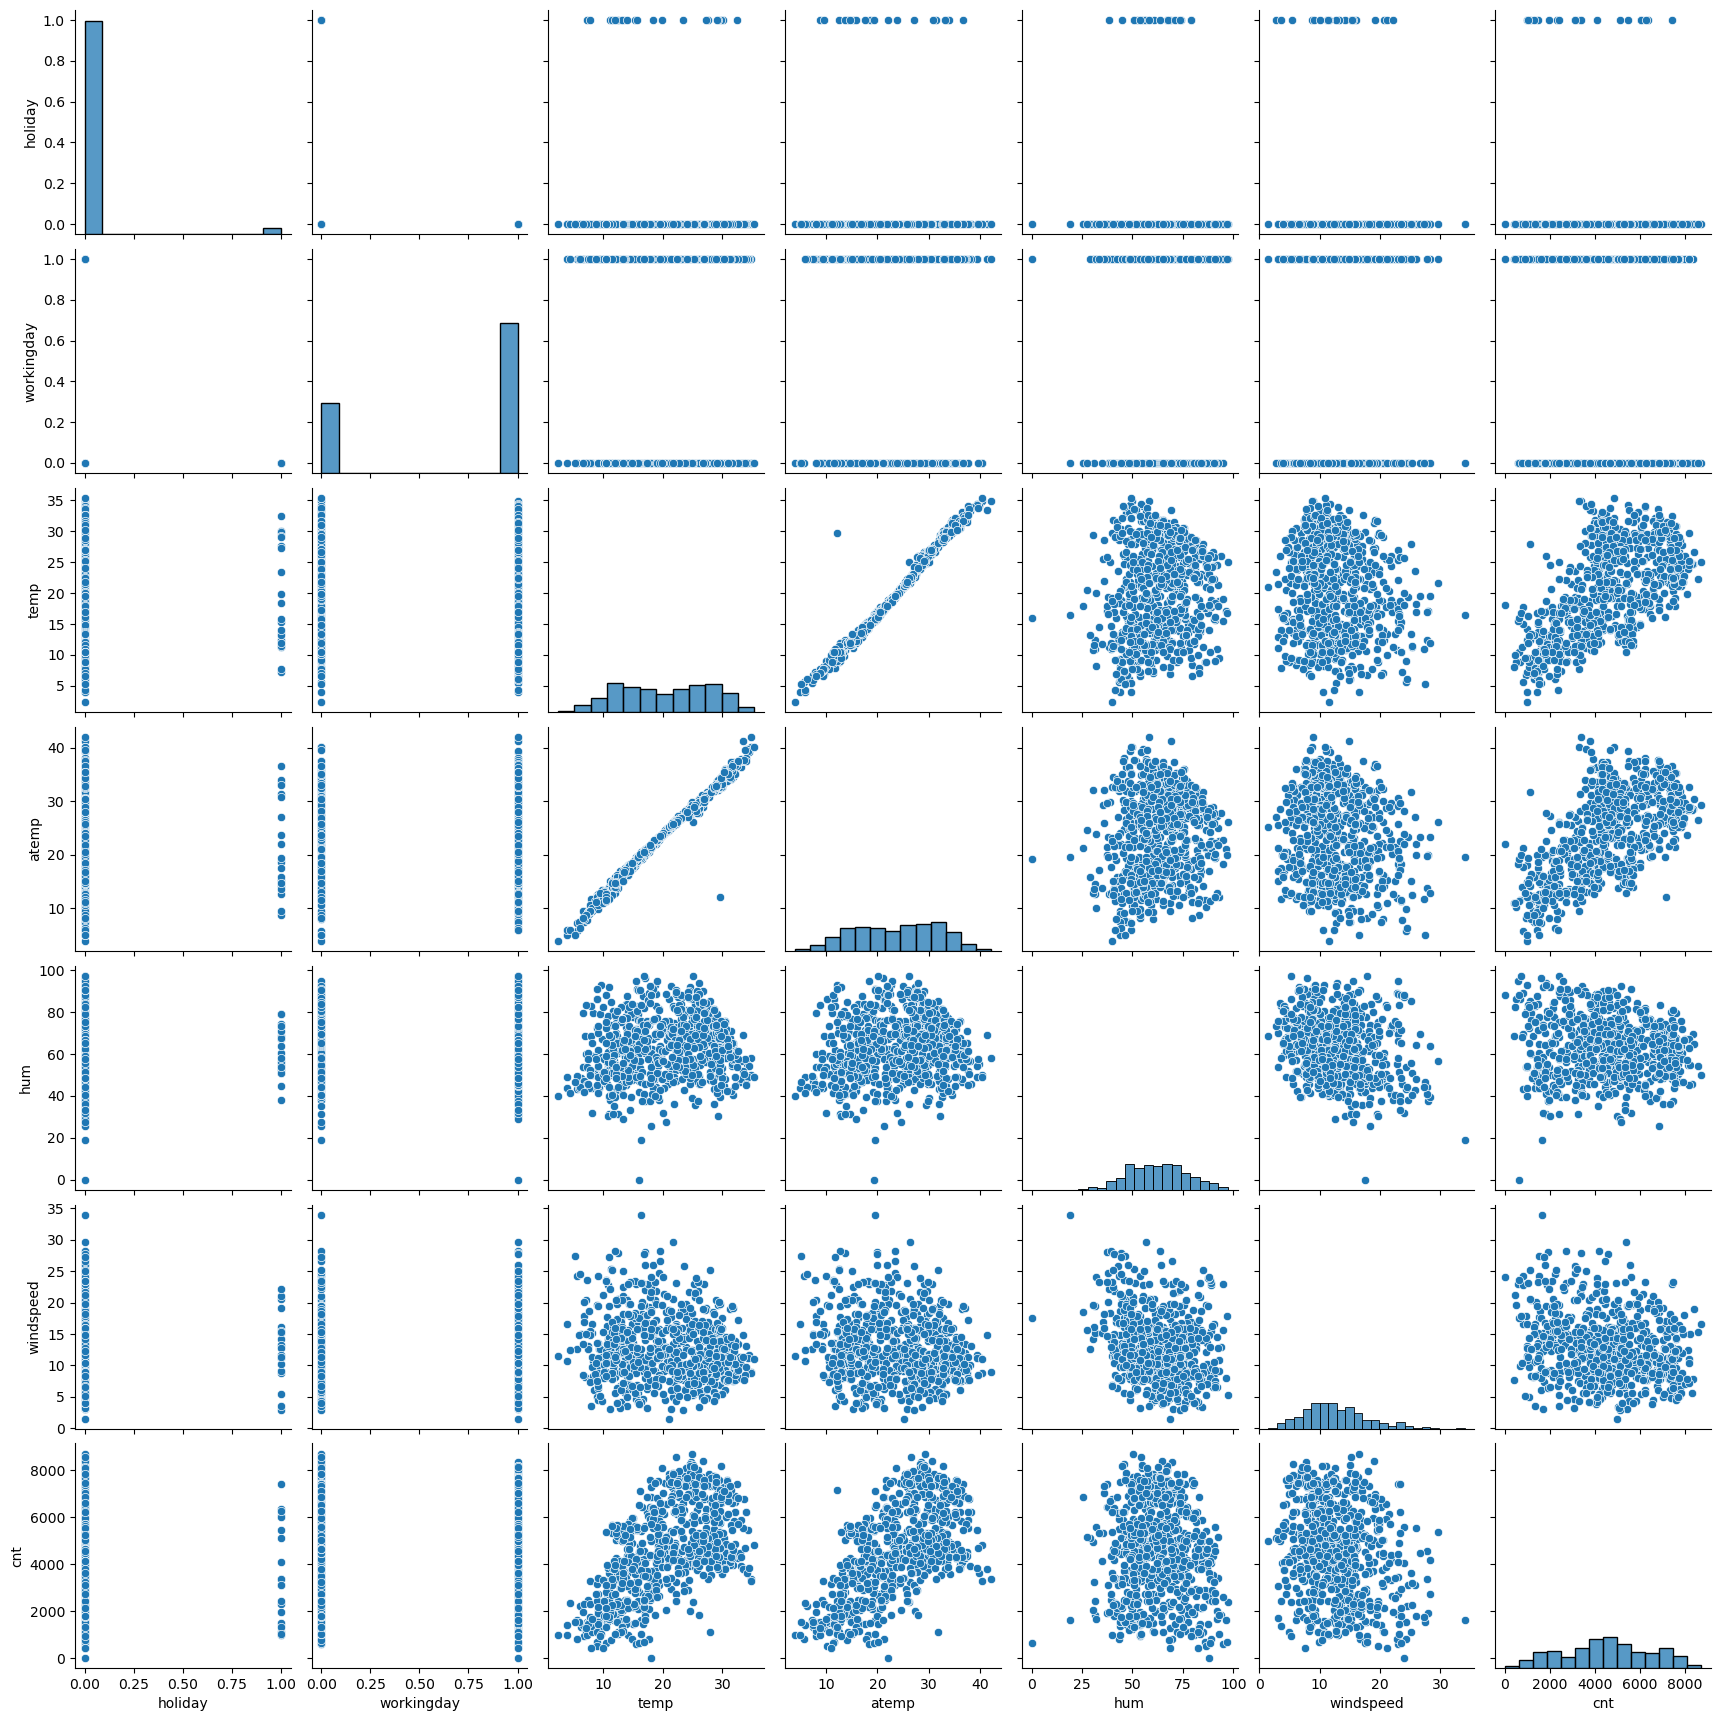

In [60]:
sns.pairplot(df)
plt.show()

#### Creating Dummy variables

In [62]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [63]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

we create dummy variable for categorical variables that have more than 2 levels, more than 2 unique values.
Here it is

- year
- season
- mnth
- weekday
- weathersit


In [65]:
dummy_data=pd.get_dummies(df[['yr','mnth','weekday','season','weathersit']], dtype=int, drop_first=True)
dummy_data.head()

,yr_2019,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,...,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,season_Spring,season_Summer,season_Winter,weathersit_Light_snow,weathersit_Mist
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [66]:
df=pd.concat([df,dummy_data],axis=1)

In [67]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr_2019',
       'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'mnth_September', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light_snow', 'weathersit_Mist'],
      dtype='object')

In [68]:
df=df.drop(['yr','mnth','weekday','season','weathersit'], axis = 1)

In [69]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'yr_2019', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light_snow',
       'weathersit_Mist'],
      dtype='object')

In [70]:
df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(220, 30)


In [71]:
df_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'yr_2019', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'mnth_September', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light_snow',
       'weathersit_Mist'],
      dtype='object')

### Feature scaling
This is done so that all the values are scaled down so that they lie between 0 and 1

In [73]:
#Min Max scaling
num_vars_cnt

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [74]:
# 1. instantiate an obj
scaler = MinMaxScaler()
# 2. Create a list of numeric vars
#num_vars_cnt 
# 3. Fit on data
df_train[num_vars_cnt] = scaler.fit_transform(df_train[num_vars_cnt])
df_test[num_vars_cnt]=scaler.transform(df_test[num_vars_cnt])

df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_2019,mnth_August,mnth_December,...,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,season_Spring,season_Summer,season_Winter,weathersit_Light_snow,weathersit_Mist
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,1,0,0,0,1,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,1,...,0,0,0,0,0,1,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,1,0,0,0,0,1,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [75]:

df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_2019,mnth_August,mnth_December,...,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,season_Spring,season_Summer,season_Winter,weathersit_Light_snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.096078,0.084314,...,0.127451,0.154902,0.158824,0.150980,0.131373,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.294988,0.278131,...,0.333805,0.362166,0.365870,0.358381,0.338139,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df_test['cnt']

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [77]:
y_train = df_train.pop("cnt")
x_train = df_train
y_test =  df_test.pop("cnt")
x_test = df_test

In [78]:
print(y_train.head())
print(x_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     holiday  workingday      temp     atemp       hum  windspeed  yr_2019  \
576        0           1  0.815169  0.766351  0.725633   0.264686        1   
426        0           0  0.442393  0.438975  0.640189   0.255342        1   
728        0           0  0.245101  0.200348  0.498067   0.663106        1   
482        0           0  0.395666  0.391735  0.504508   0.188475        1   
111        0           1  0.345824  0.318819  0.751824   0.380981        0   

     mnth_August  mnth_December  mnth_February  ...  weekday_saturday  \
576            0              0              0  ...                 0   
426            0              0              0  ...                 0   
728            0              1              0  ...                 0   
482            0              0              0  ...                 0   
111            0              0              0  ...         

In [79]:
print(y_test.head())
print(x_test.head())

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64
     holiday  workingday      temp     atemp       hum  windspeed  yr_2019  \
184        1           0  0.831783  0.769660  0.657364   0.084219        0   
535        0           1  0.901354  0.842587  0.610133   0.153728        1   
299        0           1  0.511964  0.496145  0.837699   0.334206        0   
221        0           1  0.881625  0.795343  0.437098   0.339570        0   
152        0           1  0.817246  0.741471  0.314298   0.537414        0   

     mnth_August  mnth_December  mnth_February  ...  weekday_saturday  \
184            0              0              0  ...                 0   
535            0              0              0  ...                 0   
299            0              0              0  ...                 0   
221            1              0              0  ...                 0   
152            0              0              0  ...         

### Building a model

In [81]:
#add a const
x_train_sm = sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)
#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params


const                    0.239406
holiday                  0.005054
workingday               0.090434
temp                     0.387984
atemp                    0.059045
hum                     -0.152016
windspeed               -0.183604
yr_2019                  0.232539
mnth_August              0.022270
mnth_December           -0.044274
mnth_February           -0.032316
mnth_January            -0.063064
mnth_July               -0.032657
mnth_June                0.006012
mnth_March               0.001555
mnth_May                 0.025541
mnth_November           -0.039818
mnth_October             0.007713
mnth_September           0.086761
weekday_monday           0.044849
weekday_saturday         0.009730
weekday_sunday           0.099068
weekday_thursday         0.003833
weekday_tuesday         -0.011894
weekday_wednesday       -0.008708
season_Spring           -0.045355
season_Summer            0.042369
season_Winter            0.107081
weathersit_Light_snow   -0.254975
weathersit_Mis

In [82]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.81e-180
Time:                        20:45:49   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2394      0.035      6.761      0.000       0.170       0.309
holiday                   0.0051      0.024      0.210      0.833      -0.042       0.052
workingday                0.0904      0.012      7.292      0.000       0.066       0.115
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0590      0.138      0.426      0.670      -0.213       0.331
hum                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
yr_2019                   0.2325      0.008     28.794      0.000       0.217       0.248
mnth_August               0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_December            -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_February            -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_January             -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_July                -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_June                 0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_March                0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                  0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_November            -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_October              0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_September            0.0868      0.032      2.711      0.007       0.024       0.150
weekday_monday            0.0448      0.014      3.239      0.001       0.018       0.072
weekday_saturday          0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_sunday            0.0991      0.014      7.274      0.000       0.072       0.126
weekday_thursday          0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_tuesday          -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_wednesday        -0.0087      0.015     -0.564      0.573      -0.039       0.022
season_Spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter             0.1071      0.028      3.826      0.000       0.052       0.162
weathersit_Light_snow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.

#### Understanding the Correlation between varibles to see if we can remove any elements manually

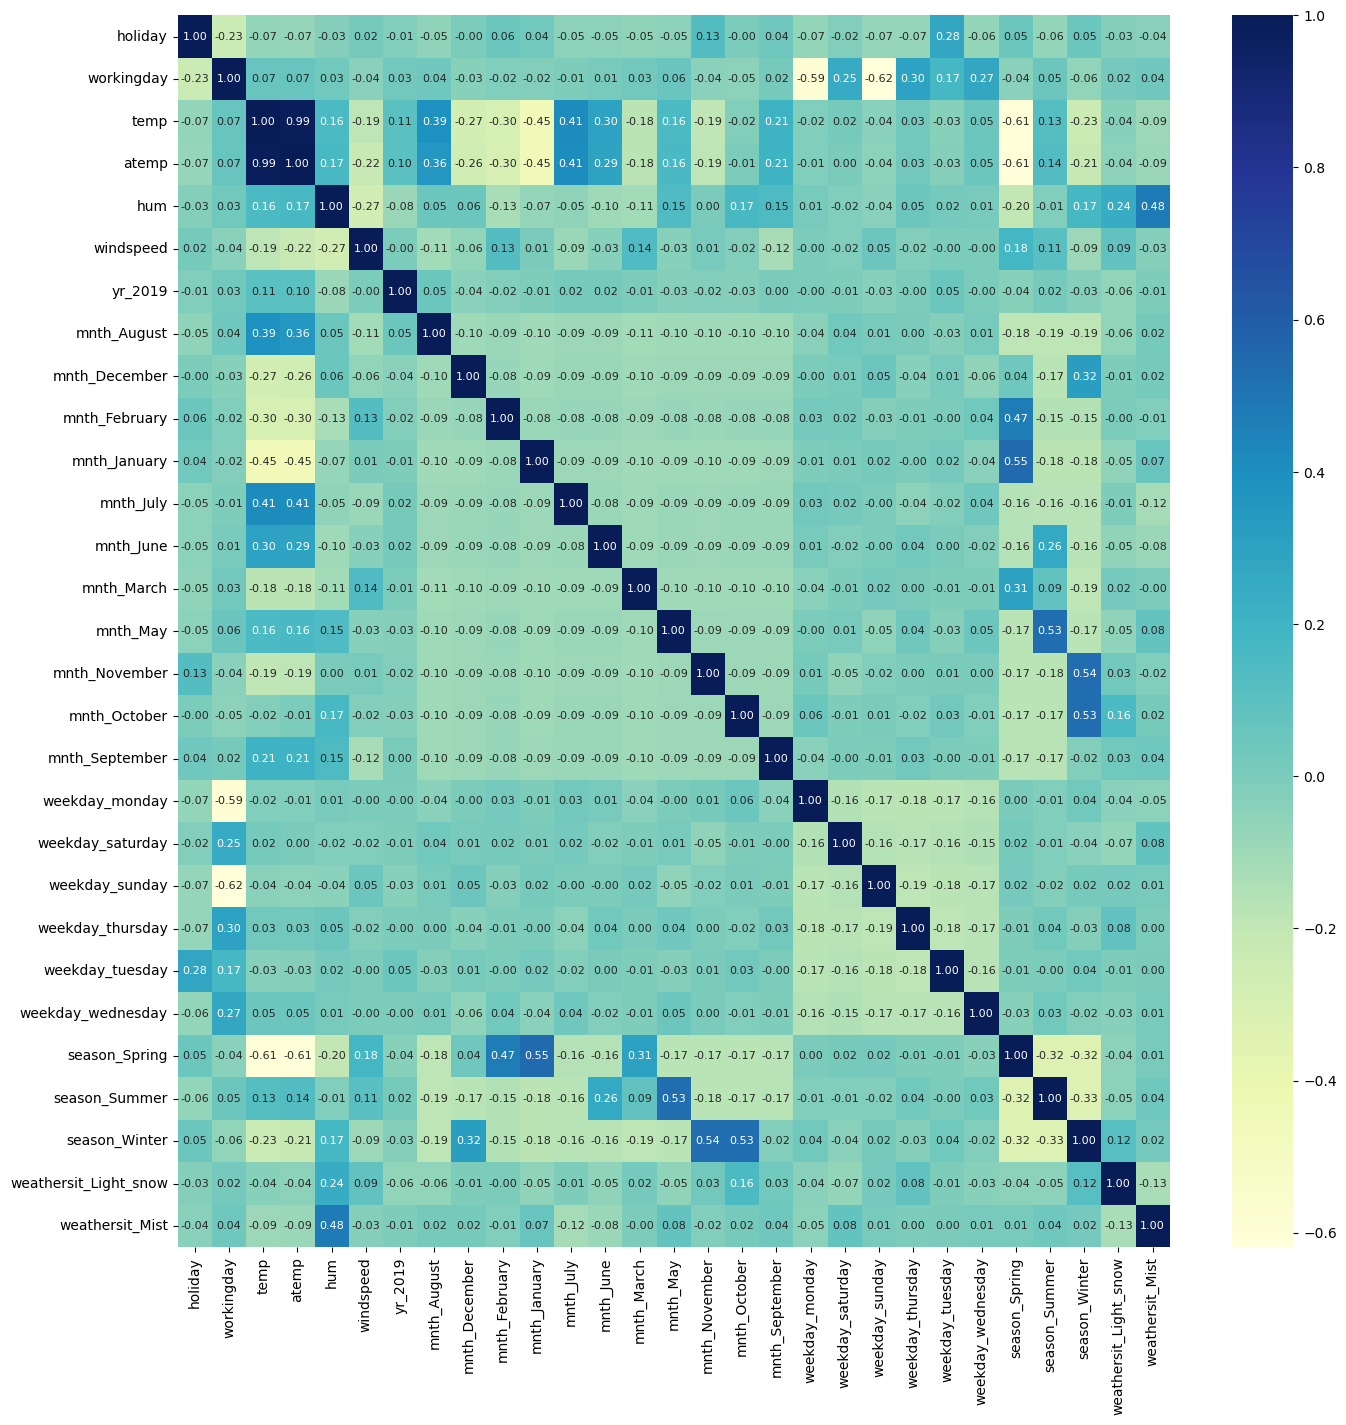

In [84]:
plt.figure(figsize = (16, 16))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 8})
plt.show()

we can drop either temp or atemp, as they have correlation almost equal to one which leads to multi collinearity.
I am dropping atemp as I am not quiet sure about the explanation when compared to temp

In [86]:
x_train = x_train.drop(["atemp"],axis=1)

### RFE

In [88]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(x_train,y_train)

In [89]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 9),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_monday', False, 2),
 ('weekday_saturday', False, 5),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 8),
 ('weekday_tuesday', False, 3),
 ('weekday_wednesday', False, 4),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light_snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [90]:
list(zip(x_test.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', True, 1),
 ('mnth_February', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', False, 7),
 ('mnth_June', False, 9),
 ('mnth_March', True, 1),
 ('mnth_May', True, 1),
 ('mnth_November', False, 6),
 ('mnth_October', True, 1),
 ('mnth_September', False, 2),
 ('weekday_monday', False, 5),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 8),
 ('weekday_thursday', False, 3),
 ('weekday_tuesday', False, 4),
 ('weekday_wednesday', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light_snow', True, 1)]

In [91]:
col = x_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'yr_2019',
       'mnth_August', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_May', 'mnth_November', 'mnth_September',
       'weekday_sunday', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light_snow', 'weathersit_Mist'],
      dtype='object')

In [92]:
x_train_vals = x_train[col]
x_test_vals = x_test[col]

#### Eliminating features based on p value and VIF scores

In [94]:
#order of removal
# high vif and high p
# high p, low vif
# high vif, low p

In [95]:
#building the model based on the selected features
#add a const
x_train_sm = sm.add_constant(x_train_vals)
x_test_sm = sm.add_constant(x_test_vals)

#create first model
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          5.23e-188
Time:                        20:45:52   Log-Likelihood:                 525.61
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2887      0.041      7.108      0.000       0.209       0.368
holiday                  -0.0490      0.027     -1.817      0.070      -0.102       0.004
workingday                0.0439      0.011      3.837      0.000       0.021       0.066
temp                      0.4509      0.038     11.761      0.000       0.376       0.526
hum                      -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed                -0.1871      0.025     -7.359      0.000      -0.237      -0.137
yr_2019                   0.2316      0.008     29.054      0.000       0.216       0.247
mnth_August               0.0151      0.024      0.640      0.522      -0.031       0.061
mnth_December            -0.0480      0.018     -2.643      0.008      -0.084      -0.012
mnth_February            -0.0348      0.021     -1.626      0.105      -0.077       0.007
mnth_January             -0.0651      0.021     -3.066      0.002      -0.107      -0.023
mnth_July                -0.0403      0.025     -1.639      0.102      -0.089       0.008
mnth_May                  0.0232      0.017      1.343      0.180      -0.011       0.057
mnth_November            -0.0451      0.019     -2.395      0.017      -0.082      -0.008
mnth_September            0.0809      0.021      3.780      0.000       0.039       0.123
weekday_sunday            0.0540      0.014      3.736      0.000       0.026       0.082
season_Spring            -0.0456      0.027     -1.717      0.087      -0.098       0.007
season_Summer             0.0397      0.023      1.709      0.088      -0.006       0.085
season_Winter             0.1090      0.023      4.814      0.000       0.065       0.154
weathersit_Light_snow    -0.2541      0.026     -9.723      0.000      -0.305      -0.203
weathersit_Mist          -0.0586      0.010     -5.671      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       81.837   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.129
Skew:                          -0.776   Prob(JB):                     1.07e-50
Kurtosis:                       5.902   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To reduce the multi collinearity problem. I am going to check the VIF Scores

In [97]:
#VIF Scores

In [98]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,108.23
16,season_Spring,8.54
17,season_Summer,6.59
18,season_Winter,6.26
3,temp,4.91
7,mnth_August,3.17
11,mnth_July,2.80
10,mnth_January,2.38
14,mnth_September,2.22
4,hum,1.97


#### Dropping "mnth_August" as it has p value greater that 0.05

In [100]:
x_train_sm = x_train_sm.drop(["mnth_August"],axis=1)
x_test_sm = x_test_sm.drop(['mnth_August'],axis = 1)

In [101]:
lr2 = sm.OLS(y_train,x_train_sm)
#fit
lr_model2 = lr2.fit()
#summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          5.20e-189
Time:                        20:45:53   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2970      0.038      7.722      0.000       0.221       0.373
holiday                  -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday                0.0441      0.011      3.852      0.000       0.022       0.067
temp                      0.4527      0.038     11.846      0.000       0.378       0.528
hum                      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                -0.1873      0.025     -7.371      0.000      -0.237      -0.137
yr_2019                   0.2318      0.008     29.103      0.000       0.216       0.247
mnth_December            -0.0488      0.018     -2.692      0.007      -0.084      -0.013
mnth_February            -0.0348      0.021     -1.626      0.105      -0.077       0.007
mnth_January             -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_July                -0.0510      0.018     -2.844      0.005      -0.086      -0.016
mnth_May                  0.0229      0.017      1.325      0.186      -0.011       0.057
mnth_November            -0.0461      0.019     -2.456      0.014      -0.083      -0.009
mnth_September            0.0723      0.017      4.349      0.000       0.040       0.105
weekday_sunday            0.0544      0.014      3.774      0.000       0.026       0.083
season_Spring            -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_Summer             0.0295      0.017      1.747      0.081      -0.004       0.063
season_Winter             0.1001      0.018      5.618      0.000       0.065       0.135
weathersit_Light_snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
weathersit_Mist          -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.18
15,season_Spring,5.79
3,temp,4.88
17,season_Winter,3.88
16,season_Summer,3.49
9,mnth_January,2.38
4,hum,1.97
2,workingday,1.88
8,mnth_February,1.87
12,mnth_November,1.82


#### Dropping "mnth_May" as it has p value greater that 0.05

In [104]:
x_train_sm=x_train_sm.drop(["mnth_May"],axis=1)
x_test_sm = x_test_sm.drop(["mnth_May"],axis = 1)

In [105]:
lr3 = sm.OLS(y_train,x_train_sm)
#fit
lr_model3 = lr3.fit()
#summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          9.80e-190
Time:                        20:45:53   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2868      0.038      7.605      0.000       0.213       0.361
holiday                  -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday                0.0442      0.011      3.860      0.000       0.022       0.067
temp                      0.4616      0.038     12.262      0.000       0.388       0.536
hum                      -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                -0.1889      0.025     -7.441      0.000      -0.239      -0.139
yr_2019                   0.2312      0.008     29.052      0.000       0.216       0.247
mnth_December            -0.0474      0.018     -2.619      0.009      -0.083      -0.012
mnth_February            -0.0334      0.021     -1.562      0.119      -0.075       0.009
mnth_January             -0.0634      0.021     -2.991      0.003      -0.105      -0.022
mnth_July                -0.0515      0.018     -2.868      0.004      -0.087      -0.016
mnth_November            -0.0444      0.019     -2.371      0.018      -0.081      -0.008
mnth_September            0.0723      0.017      4.346      0.000       0.040       0.105
weekday_sunday            0.0540      0.014      3.743      0.000       0.026       0.082
season_Spring            -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_Summer             0.0393      0.015      2.586      0.010       0.009       0.069
season_Winter             0.1021      0.018      5.752      0.000       0.067       0.137
weathersit_Light_snow    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
weathersit_Mist          -0.0585      0.010     -5.668      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,93.26
14,season_Spring,5.69
3,temp,4.73
16,season_Winter,3.85
15,season_Summer,2.82
9,mnth_January,2.37
4,hum,1.94
2,workingday,1.88
8,mnth_February,1.86
11,mnth_November,1.81


#### Dropping "mnth_February" as it has p value greater that 0.05

In [108]:
x_train_sm=x_train_sm.drop(["mnth_February"],axis=1)
x_test_sm = x_test_sm.drop(["mnth_February"],axis = 1)

In [109]:
lr4 = sm.OLS(y_train,x_train_sm)
#fit
lr_model4 = lr4.fit()
#summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.52e-190
Time:                        20:45:53   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2756      0.037      7.433      0.000       0.203       0.348
holiday                  -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday                0.0444      0.011      3.870      0.000       0.022       0.067
temp                      0.4764      0.036     13.064      0.000       0.405       0.548
hum                      -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                -0.1879      0.025     -7.390      0.000      -0.238      -0.138
yr_2019                   0.2309      0.008     28.978      0.000       0.215       0.247
mnth_December            -0.0388      0.017     -2.248      0.025      -0.073      -0.005
mnth_January             -0.0455      0.018     -2.548      0.011      -0.081      -0.010
mnth_July                -0.0524      0.018     -2.916      0.004      -0.088      -0.017
mnth_November            -0.0399      0.019     -2.152      0.032      -0.076      -0.003
mnth_September            0.0737      0.017      4.430      0.000       0.041       0.106
weekday_sunday            0.0548      0.014      3.794      0.000       0.026       0.083
season_Spring            -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_Summer             0.0424      0.015      2.809      0.005       0.013       0.072
season_Winter             0.1038      0.018      5.845      0.000       0.069       0.139
weathersit_Light_snow    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
weathersit_Mist          -0.0583      0.010     -5.637      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.88
13,season_Spring,5.27
3,temp,4.43
15,season_Winter,3.83
14,season_Summer,2.77
4,hum,1.94
2,workingday,1.88
12,weekday_sunday,1.79
10,mnth_November,1.77
8,mnth_January,1.68


#### Dropping "holiday" as it has p value greater that 0.05

In [112]:
x_train_sm=x_train_sm.drop(["holiday"],axis=1)
x_test_sm = x_test_sm.drop(["holiday"],axis = 1)

In [113]:
lr5 = sm.OLS(y_train,x_train_sm)
#fit
lr_model5 = lr5.fit()
#summary
lr_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.20e-190
Time:                        20:45:54   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2690      0.037      7.267      0.000       0.196       0.342
workingday                0.0521      0.011      4.826      0.000       0.031       0.073
temp                      0.4744      0.037     12.978      0.000       0.403       0.546
hum                      -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                -0.1883      0.025     -7.386      0.000      -0.238      -0.138
yr_2019                   0.2311      0.008     28.929      0.000       0.215       0.247
mnth_December            -0.0398      0.017     -2.302      0.022      -0.074      -0.006
mnth_January             -0.0465      0.018     -2.596      0.010      -0.082      -0.011
mnth_July                -0.0514      0.018     -2.854      0.004      -0.087      -0.016
mnth_November            -0.0441      0.018     -2.390      0.017      -0.080      -0.008
mnth_September            0.0714      0.017      4.289      0.000       0.039       0.104
weekday_sunday            0.0625      0.014      4.493      0.000       0.035       0.090
season_Spring            -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_Summer             0.0421      0.015      2.783      0.006       0.012       0.072
season_Winter             0.1038      0.018      5.832      0.000       0.069       0.139
weathersit_Light_snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
weathersit_Mist          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.13
12,season_Spring,5.26
2,temp,4.42
14,season_Winter,3.83
13,season_Summer,2.77
3,hum,1.94
9,mnth_November,1.75
7,mnth_January,1.68
1,workingday,1.66
11,weekday_sunday,1.65


#### Dropping "season_Spring" as it has VIF Valus greater than 5

In [116]:
x_train_sm=x_train_sm.drop(["season_Spring"],axis=1)
x_test_sm = x_test_sm.drop(["season_Spring"],axis = 1)

In [117]:
lr6 = sm.OLS(y_train,x_train_sm)
#fit
lr_model6 = lr6.fit()
#summary
lr_model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          6.82e-190
Time:                        20:45:54   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2037      0.030      6.784      0.000       0.145       0.263
workingday                0.0528      0.011      4.857      0.000       0.031       0.074
temp                      0.5492      0.027     20.533      0.000       0.497       0.602
hum                      -0.1600      0.038     -4.265      0.000      -0.234      -0.086
windspeed                -0.1969      0.026     -7.713      0.000      -0.247      -0.147
yr_2019                   0.2297      0.008     28.578      0.000       0.214       0.245
mnth_December            -0.0338      0.017     -1.952      0.051      -0.068       0.000
mnth_January             -0.0504      0.018     -2.801      0.005      -0.086      -0.015
mnth_July                -0.0411      0.018     -2.308      0.021      -0.076      -0.006
mnth_November            -0.0343      0.018     -1.877      0.061      -0.070       0.002
mnth_September            0.0864      0.016      5.402      0.000       0.055       0.118
weekday_sunday            0.0632      0.014      4.509      0.000       0.036       0.091
season_Summer             0.0733      0.011      6.665      0.000       0.052       0.095
season_Winter             0.1395      0.013     10.524      0.000       0.113       0.166
weathersit_Light_snow    -0.2488      0.026     -9.468      0.000      -0.300      -0.197
weathersit_Mist          -0.0552      0.010     -5.307      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       73.135   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.330
Skew:                          -0.749   Prob(JB):                     1.40e-38
Kurtosis:                       5.442   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.71
2,temp,2.33
13,season_Winter,2.09
3,hum,1.91
9,mnth_November,1.69
7,mnth_January,1.67
1,workingday,1.66
11,weekday_sunday,1.65
15,weathersit_Mist,1.56
6,mnth_December,1.48


#### Dropping "mnth_November" as it has p value greater that 0.05

In [120]:
x_train_sm=x_train_sm.drop(["mnth_November"],axis=1)
x_test_sm = x_test_sm.drop(["mnth_November"],axis = 1)

In [121]:
lr7 = sm.OLS(y_train,x_train_sm)
#fit
lr_model7 = lr7.fit()
#summary
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.76e-190
Time:                        20:45:54   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1959      0.030      6.571      0.000       0.137       0.254
workingday                0.0531      0.011      4.876      0.000       0.032       0.075
temp                      0.5582      0.026     21.164      0.000       0.506       0.610
hum                      -0.1592      0.038     -4.233      0.000      -0.233      -0.085
windspeed                -0.1969      0.026     -7.695      0.000      -0.247      -0.147
yr_2019                   0.2297      0.008     28.507      0.000       0.214       0.246
mnth_December            -0.0214      0.016     -1.332      0.183      -0.053       0.010
mnth_January             -0.0456      0.018     -2.553      0.011      -0.081      -0.011
mnth_July                -0.0421      0.018     -2.358      0.019      -0.077      -0.007
mnth_September            0.0894      0.016      5.604      0.000       0.058       0.121
weekday_sunday            0.0640      0.014      4.551      0.000       0.036       0.092
season_Summer             0.0747      0.011      6.790      0.000       0.053       0.096
season_Winter             0.1268      0.011     11.089      0.000       0.104       0.149
weathersit_Light_snow    -0.2457      0.026     -9.344      0.000      -0.297      -0.194
weathersit_Mist          -0.0547      0.010     -5.246      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.968   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.157
Skew:                          -0.732   Prob(JB):                     5.04e-37
Kurtosis:                       5.392   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.61
2,temp,2.26
3,hum,1.91
1,workingday,1.66
10,weekday_sunday,1.65
7,mnth_January,1.63
14,weathersit_Mist,1.56
12,season_Winter,1.55
8,mnth_July,1.43
11,season_Summer,1.43


#### Dropping "mnth_December" as it has p value greater that 0.05

In [124]:
x_train_sm=x_train_sm.drop(["mnth_December"],axis=1)
x_test_sm = x_test_sm.drop(["mnth_December"],axis = 1)

In [125]:
lr8 = sm.OLS(y_train,x_train_sm)
#fit
lr_model8 = lr8.fit()
#summary
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          4.53e-191
Time:                        20:45:54   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1907      0.030      6.447      0.000       0.133       0.249
workingday                0.0526      0.011      4.824      0.000       0.031       0.074
temp                      0.5684      0.025     22.506      0.000       0.519       0.618
hum                      -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed                -0.1943      0.026     -7.609      0.000      -0.244      -0.144
yr_2019                   0.2296      0.008     28.473      0.000       0.214       0.245
mnth_January             -0.0401      0.017     -2.306      0.022      -0.074      -0.006
mnth_July                -0.0429      0.018     -2.402      0.017      -0.078      -0.008
mnth_September            0.0909      0.016      5.715      0.000       0.060       0.122
weekday_sunday            0.0629      0.014      4.476      0.000       0.035       0.090
season_Summer             0.0765      0.011      6.997      0.000       0.055       0.098
season_Winter             0.1251      0.011     11.000      0.000       0.103       0.147
weathersit_Light_snow    -0.2425      0.026     -9.253      0.000      -0.294      -0.191
weathersit_Mist          -0.0538      0.010     -5.172      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.65
2,temp,2.07
3,hum,1.89
1,workingday,1.65
9,weekday_sunday,1.64
13,weathersit_Mist,1.56
6,mnth_January,1.55
11,season_Winter,1.53
7,mnth_July,1.43
10,season_Summer,1.41


The above model has all the p values < 0.05 and VIF values < 5

### Residual Analysis

In [129]:
x_train_sm.columns

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'yr_2019',
       'mnth_January', 'mnth_July', 'mnth_September', 'weekday_sunday',
       'season_Summer', 'season_Winter', 'weathersit_Light_snow',
       'weathersit_Mist'],
      dtype='object')

In [130]:
y_train_pred = lr_model8.predict(x_train_sm)
y_train_pred.head()

576    0.722741
426    0.526035
728    0.348979
482    0.611231
111    0.264984
dtype: float64

Text(0.5, 0, 'Residuals')

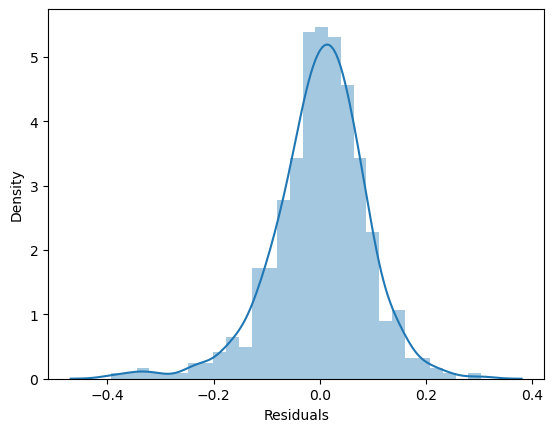

In [131]:
res = y_train - y_train_pred
sns.distplot(res)#distribution of errors, it should be normal dist and centered around zero
plt.xlabel('Residuals' )

- From the graph above it is evident that the errors are normally distributed.
- The errors are centered around zero.
- It also shows that constant variance(homoscedasticity) is maintained.

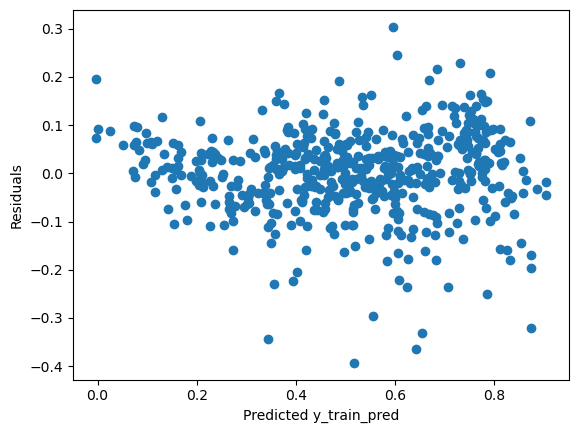

In [133]:
#step4 - Prediction and evaluation of test set
#Residual Plot
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted y_train_pred')
plt.ylabel('Residuals')
plt.show()


- The residuals are randomly scattered
- There is not pattern, hence we can tell the variables are independent
- As there is no pattern like gradually incresing or decresing which means constant variance is maintained.

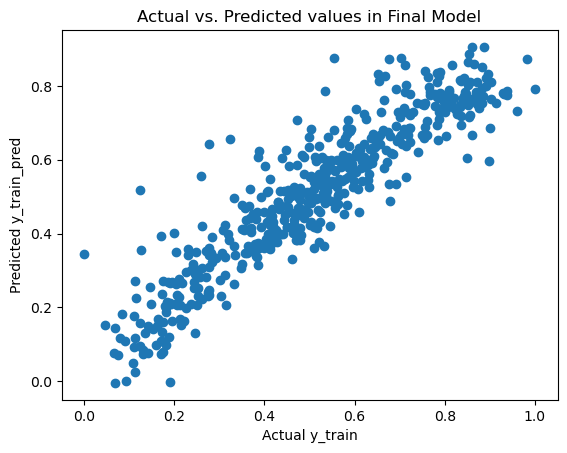

In [135]:
#Actual vs. Predicted values in Final Model
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train_pred')
plt.title('Actual vs. Predicted values in Final Model')
plt.show()

- No clusters formed
- Good pattern is maintained

### Scatter plot of actual vs. predicted values

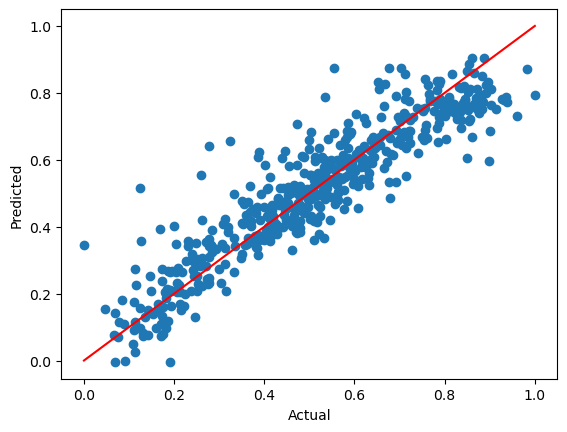

In [138]:
plt.scatter(y_train, y_train_pred )
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

- All the points are close to the ideal line which indicated good prediction

### Making Predictions using the final  model

In [141]:
y_test_pred = lr_model8.predict(x_test_sm)
y_test_pred.head()

184    0.442461
535    0.931639
299    0.403016
221    0.606666
152    0.628274
dtype: float64

In [142]:
# R2 Value
r_squared_test = round(r2_score(y_test, y_test_pred), 4)
print(r_squared_test)

0.8051


 - R square value is around 80.51%, which represents a decent model